In [0]:
# Autoreload the libraries 
%reload_ext autoreload
%autoreload 2
%matplotlib inline 

In [0]:
# Import the libraries
from fastai import * 
from fastai.vision import * 

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()


# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

Gen RAM Free: 11.2 GB  | Proc size: 2.6 GB
GPU RAM Free: 9260MB | Used: 2181MB | Util  19% | Total 11441MB


In [0]:
folder = 'soccer'
file = 'url_soccer.txt'

In [0]:
path = Path('data/sports')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
# shutil.move("url_american_football.txt", "data/sports/")
# shutil.move("url_soccer.txt", "data/sports/")

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
folder = 'american_football'
file = 'url_american_football.txt'

In [0]:
path = Path('data/sports')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
classes = ['soccer', 'american_football']

In [0]:
for i in classes:
    print(i)
    verify_images(path/i, delete=True, max_size=500)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=300, num_workers=0).normalize(imagenet_stats)


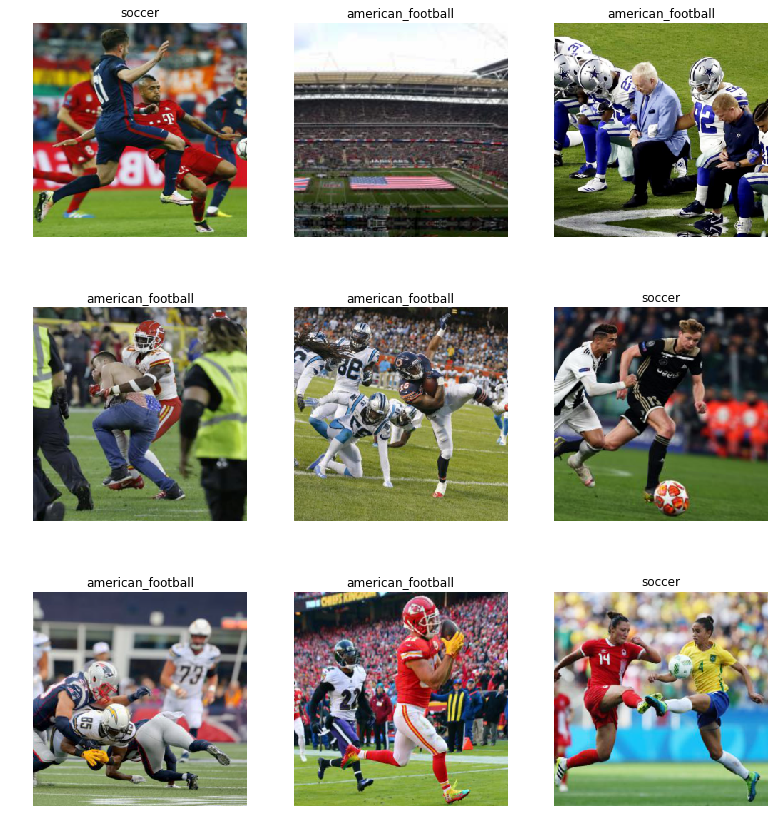

In [0]:
data.classes
data.show_batch(rows=3, figsize=(11,12))

In [0]:
data.c, len(data.train_ds), len(data.valid_ds)

(2, 152, 37)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.164018,0.597091,0.270270,00:05
1,0.802003,0.066482,0.027027,00:05
2,0.568322,0.078480,0.027027,00:05
3,0.468014,0.084524,0.027027,00:05
4,0.383845,0.091667,0.027027,00:05
5,0.330949,0.095800,0.027027,00:05


In [0]:
learn.save('stage-1')

In [0]:
learn.load('stage-1')
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


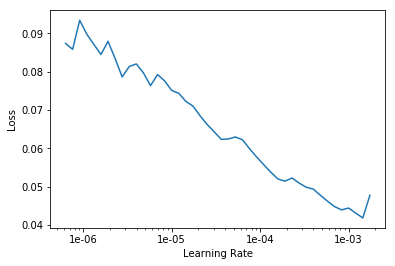

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.053919,0.136261,0.027027,00:05
1,0.048362,0.105762,0.054054,00:05


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

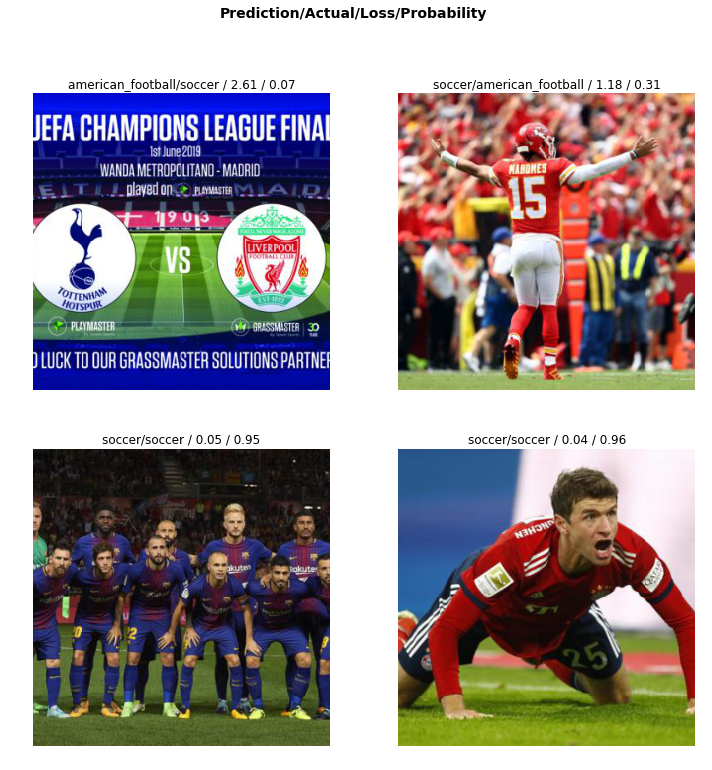

In [0]:
interp.plot_top_losses(4)

interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import * 

In [0]:
# ??ImageCleaner

# ds, idxs = DatasetFormatter().from_toplosses(learn, n_imgs=100)

"""
ImageCleaner doesn't work in Colab
will continue to not work in 
colab and probably never will since they made the
choice to design a new tool instead of using the 
one everyone else uses.
"""
# ImageCleaner(ds, idxs, path)

"\nImageCleaner doesn't work in Colab\nwill continue to not work in \ncolab and probably never will since they made the\nchoice to design a new tool instead of using the \none everyone else uses.\n"

In [0]:
data.classes

['american_football', 'soccer']

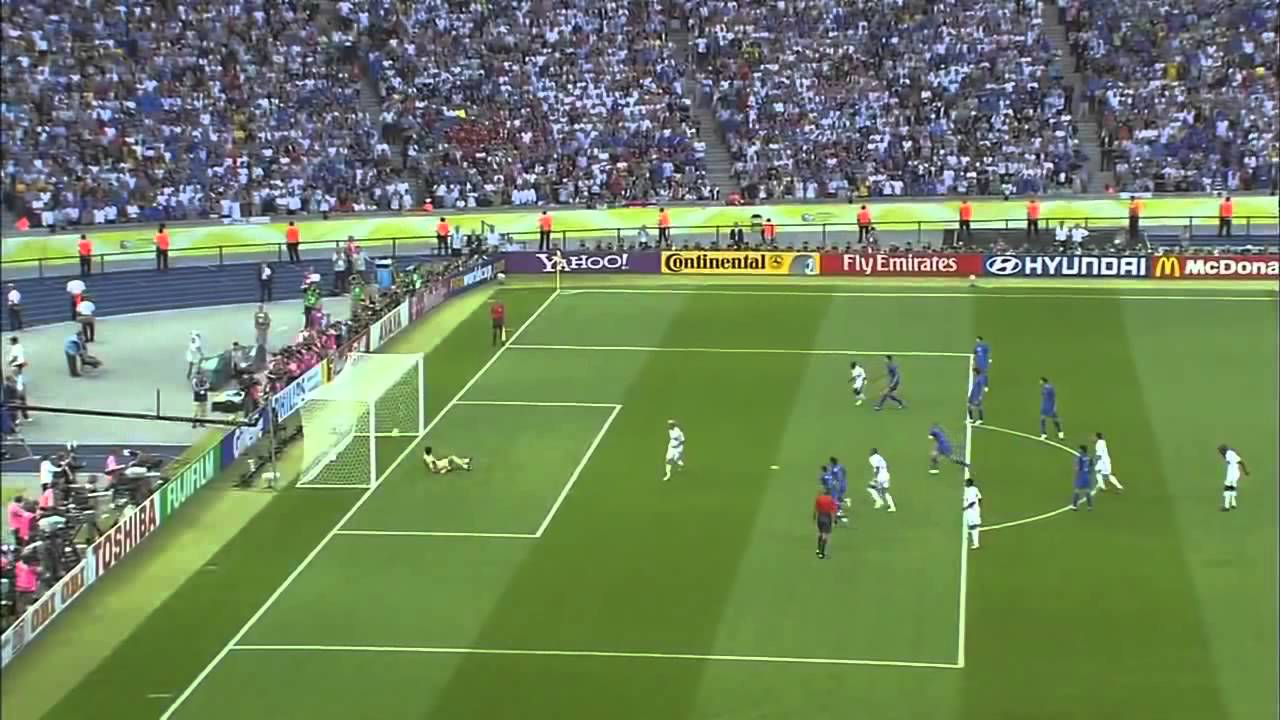

In [78]:
img = open_image('example-1.jpg')
img

In [0]:
data2 = ImageDataBunch.single_from_classes(path, classes, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data2, models.resnet34).load('stage-2')

In [0]:
prediction_class, prediction_index, outputs = learn.predict(img)

In [83]:
prediction_class

Category soccer